#TEXT ANALYSIS
##ANALYZING PEOPLE'S COMMENTS ON THE EBAY CEO'S POST ON LINKEDIN

Importing Pandas and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import locale
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Importing data file csv. I used PhantomBuster to scraping Linkedin details

In [19]:
file_path ="/content/Jamie_Fashion_more_sustainable_cmts.csv"

# Importing Data
df = pd.read_csv(file_path)
df.head()



,comment
0,Fantastic update
1,Jamie Iannone You have an emerging Seller frau...
2,Ebay username: jusharm\nEmail address: Aguilar...
3,It's inspiring to see such impactful steps tow...
4,"What is the worse platform I have used , they ..."


In [21]:
print(df)

                                             comment
0                                   Fantastic update
1  Jamie Iannone You have an emerging Seller frau...
2  Ebay username: jusharm\nEmail address: Aguilar...
3  It's inspiring to see such impactful steps tow...
4  What is the worse platform I have used , they ...
5  This may be the case, but if your crusade agai...
6  With eBay sales less in 2023 than they were in...
7                                       Mc011 crooks
8  It's inspiring to see eBay leading the charge ...
9  I loved watching the show on eBay live. Such a...


##Define Stop Words

In [23]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download stopwords if you haven't done so
nltk.download('punkt')
nltk.download('stopwords')

# Get the English stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Define a function to remove stop words:

In [24]:
def remove_stop_words(text):
    words = word_tokenize(text)
    # converts the words in word_tokens to lower case and then checks whether
    #they are present in stop_words or not
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

Apply the function to the DataFrame column:

In [27]:
df['cleaned_text'] = df['comment'].apply(remove_stop_words)
print(df)

                                             comment  \
0                                   Fantastic update   
1  Jamie Iannone You have an emerging Seller frau...   
2  Ebay username: jusharm\nEmail address: Aguilar...   
3  It's inspiring to see such impactful steps tow...   
4  What is the worse platform I have used , they ...   
5  This may be the case, but if your crusade agai...   
6  With eBay sales less in 2023 than they were in...   
7                                       Mc011 crooks   
8  It's inspiring to see eBay leading the charge ...   
9  I loved watching the show on eBay live. Such a...   

                                        cleaned_text  
0                                   Fantastic update  
1  Jamie Iannone emerging Seller fraud scheme pla...  
2  Ebay username : jusharm Email address : Aguila...  
3  's inspiring see impactful steps toward greene...  
4  worse platform used , suspended reason . sold ...  
5  may case , crusade sellers doesnt stop 're goi... 

##N-Gram Analysis

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer object
# CountVectorizer converts a collection of text documents to a matrix of token counts
c_vec = CountVectorizer(stop_words=stopwords_list, ngram_range=(2,3))
# Fit the CountVectorizer to the reviews data to get a matrix of ngrams
ngrams = c_vec.fit_transform(df['cleaned_text'])
# Count the frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# Get a list of ngrams
vocab = c_vec.vocabulary_
# Create a DataFrame to store the frequency and n-gram, sorted in descending order of frequency
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})
# Display the top 10 n-grams by frequency
df_ngram.head(n=10)

,frequency,bigram/trigram
0,3,selling ebay
1,2,sale price
2,2,inspiring see
3,2,good selling
4,2,get account
5,2,90th day
6,2,20 years
7,2,18 55
8,1,zero issues 20
9,1,zero issues


##TOPIC MODELING

Topic Modeling
Topic modeling is a technique used to discover the main topics or themes within a collection of documents. It helps to organize text data and provides a concise representation of the underlying information. There are two main models for topic modeling: Non-Negative Matrix Factorization (NMF) models and Latent Dirichlet Allocation (LDA) models.

In this example, we will use the NMF method.

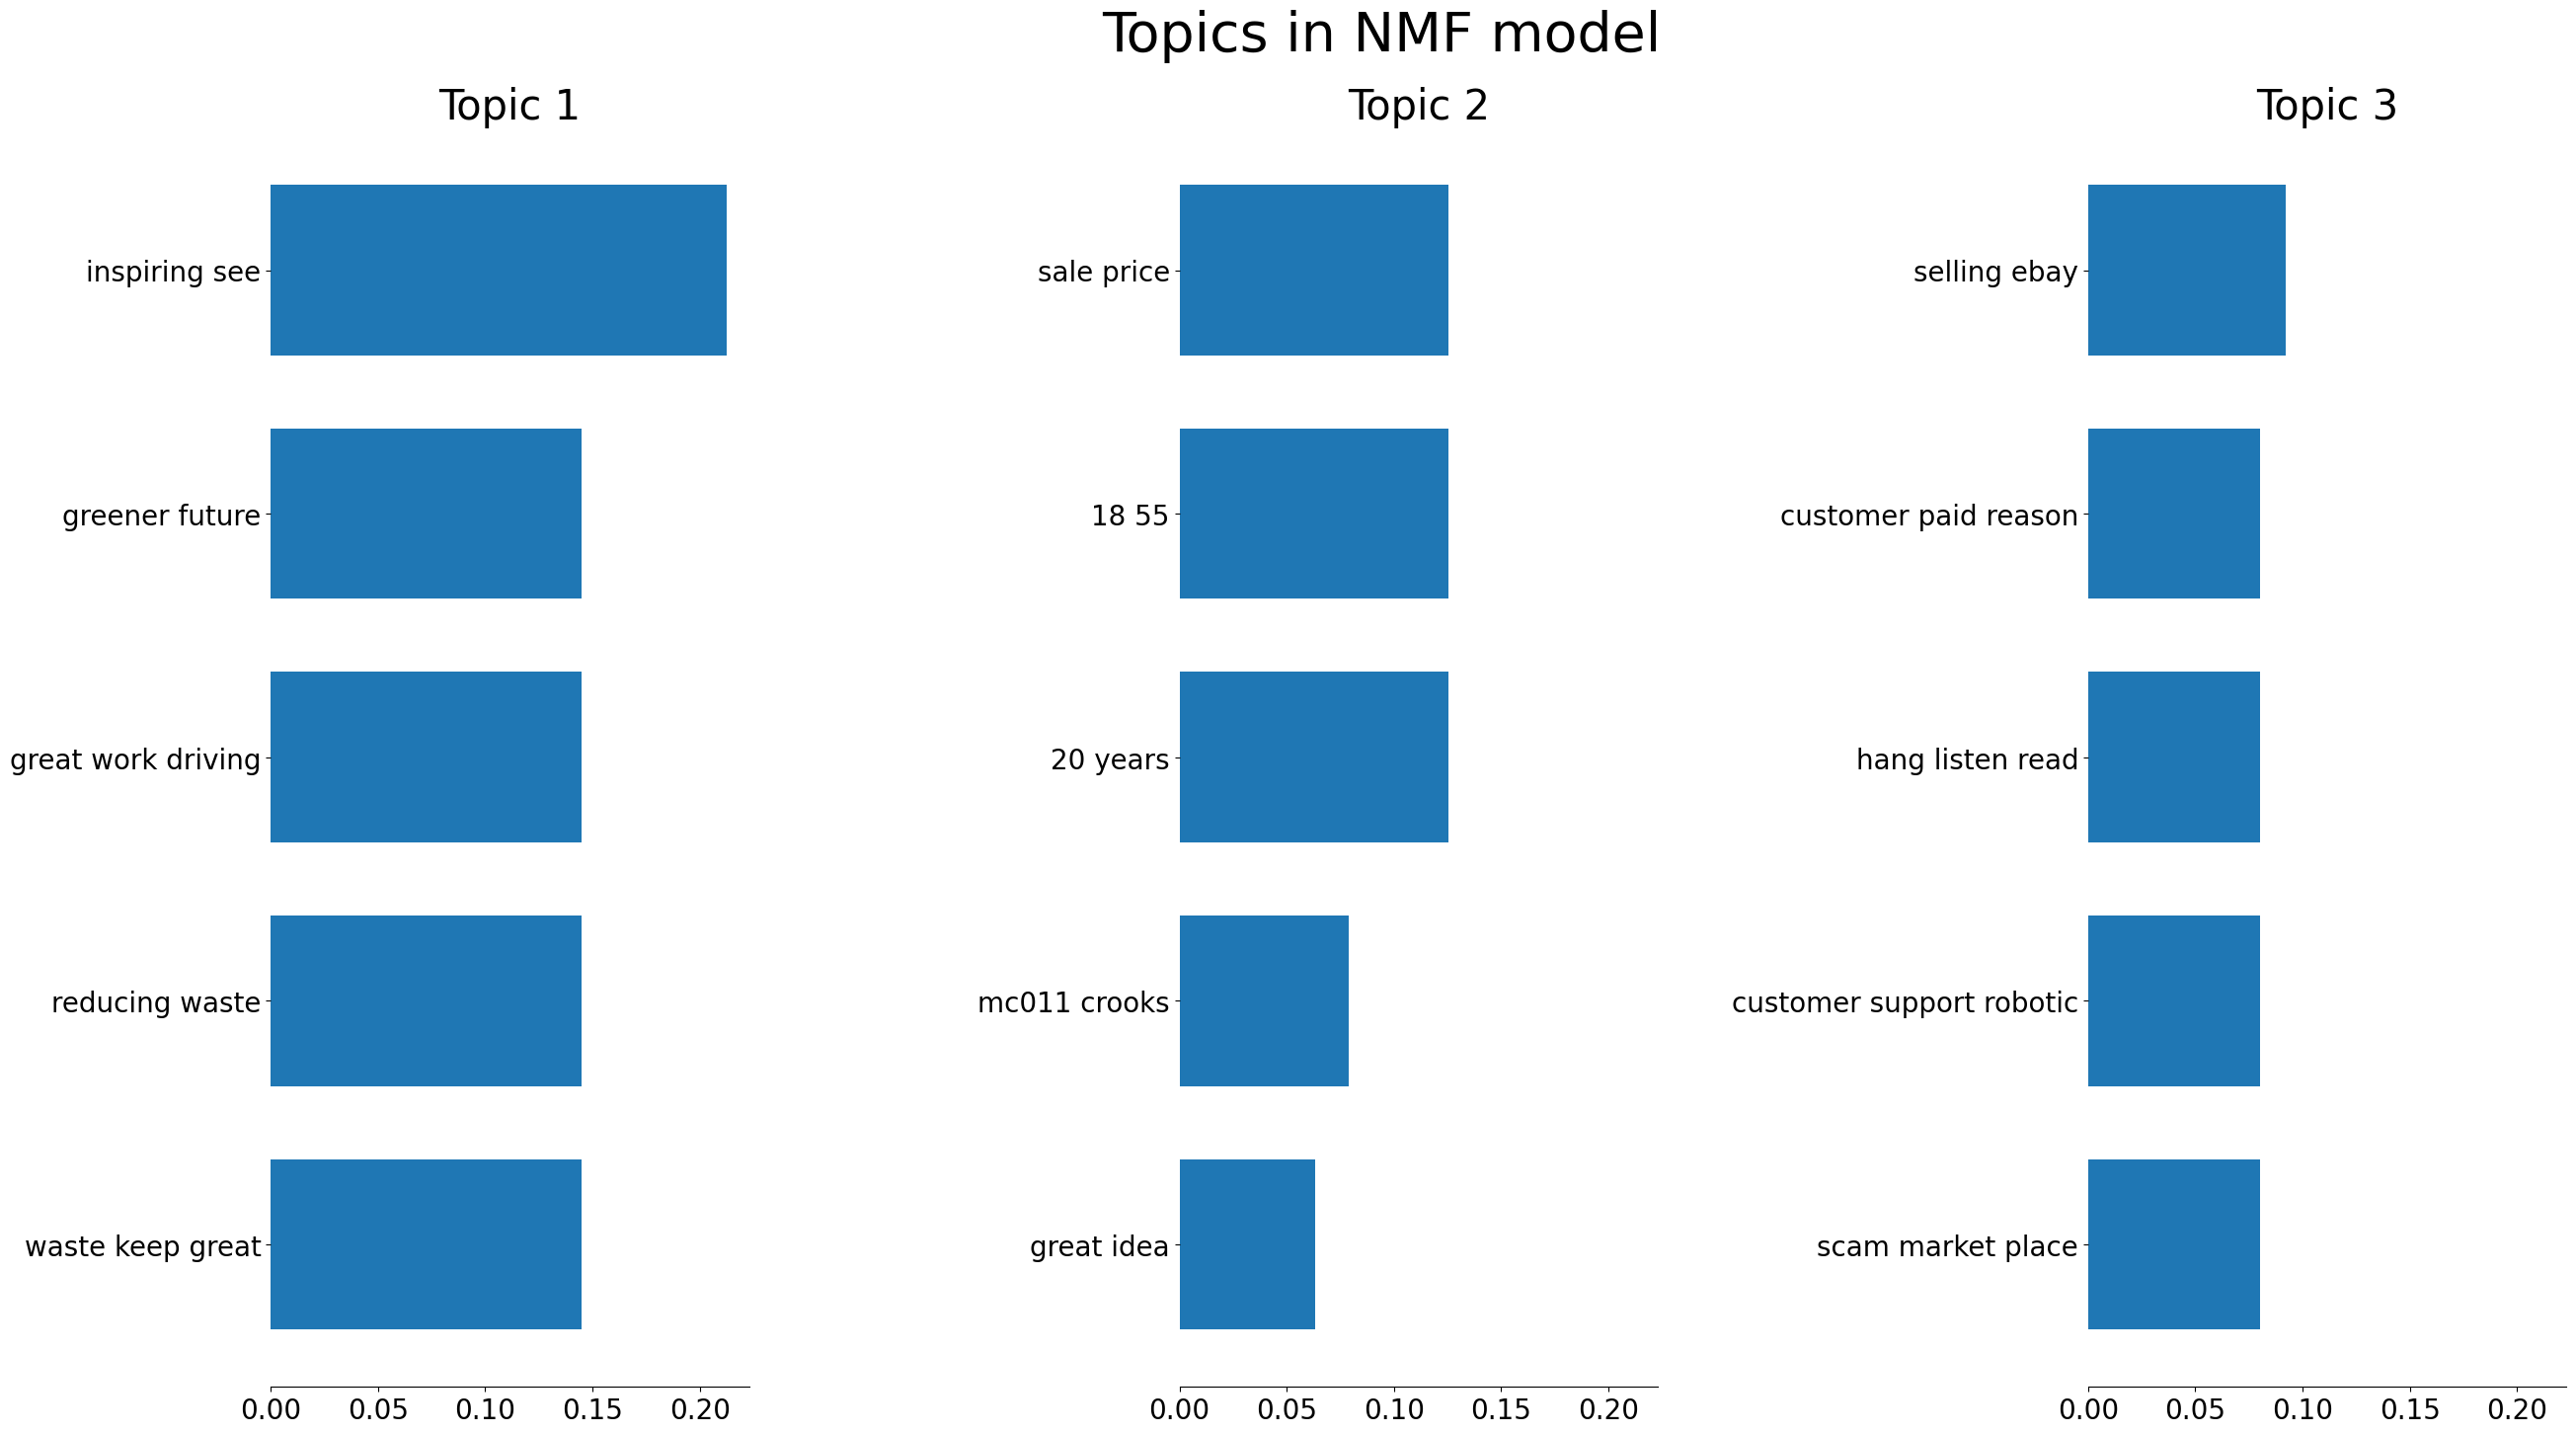

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline

# Create a TF-IDF vectorizer object
# TF-IDF (Term Frequency-Inverse Document Frequency) is a technique used to quantify a word in documents
# It is used to reflect how important a word is to a document in a collection or corpus
# The stop_words parameter is used to ignore common words in English such as 'this', 'is', etc.
# The ngram_range parameter is used to specify the size of word chunks to consider as features
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords_list, ngram_range=(2,3))

# Create an NMF (Non-Negative Matrix Factorization) object
# The n_components parameter is used to specify the number of topics to extract
nmf = NMF(n_components=3)

# Create a pipeline object that sequentially applies the TF-IDF vectorizer and NMF
pipe = make_pipeline(tfidf_vectorizer, nmf)

# Fit the pipeline to the reviews data
pipe.fit(df['cleaned_text'])

def plot_top_words(model, feature_names, n_top_words, title):
    """
    Plot top words in topics
    source: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py
    """
    import matplotlib.pyplot as plt
    fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

# Plot the top words in the topics identified by the NMF model
plot_top_words(
    nmf, tfidf_vectorizer.get_feature_names_out(), 5, "Topics in NMF model"
)

In this example we will use Latent Dirichlet Allocation (LDA) method


The next step is to prepare the input data for the LDA model. LDA takes as input a document-term matrix.

We will be using Bag of Words, specifically the CountVectorizer implementation from scikit-learn

In [35]:
from gensim import corpora
from gensim.models import LdaModel

Prepare Data for LDA

In [50]:
def preprocess_text(text):
    words = word_tokenize(text.lower())  # Lowercase and tokenize
    return [word for word in words if word.isalpha() and word not in stop_words]  # Remove stop words and non-alpha

In [56]:
# Preprocess the text column
processed_docs = df['cleaned_text'].apply(preprocess_text)

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [58]:
print(df['cleaned_text'])

0                                     Fantastic update
1    Jamie Iannone emerging Seller fraud scheme pla...
2    Ebay username : jusharm Email address : Aguila...
3    's inspiring see impactful steps toward greene...
4    worse platform used , suspended reason . sold ...
5    may case , crusade sellers doesnt stop 're goi...
6    eBay sales less 2023 2011 maybe circle n't rig...
7                                         Mc011 crooks
8    's inspiring see eBay leading charge sustainab...
9         loved watching show eBay live . great idea !
Name: cleaned_text, dtype: object


Apply LDA

In [59]:
# Set parameters for LDA
num_topics = 4  # Set the number of topics

# Create LDA model
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Print the topics
for idx, topic in lda_model.print_topics(num_words=4):
    print(f"Topic {idx}: {topic}")

Topic 0: 0.028*"account" + 0.024*"ebay" + 0.020*"selling" + 0.020*"suspended"
Topic 1: 0.028*"ebay" + 0.016*"great" + 0.016*"way" + 0.016*"go"
Topic 2: 0.036*"please" + 0.025*"platform" + 0.025*"reach" + 0.025*"scheme"
Topic 3: 0.030*"sale" + 0.018*"ebay" + 0.018*"account" + 0.018*"item"


OTHER METHOD TO APPLY LDA

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(stop_words=stopwords_list, lowercase=True, max_df=10, min_df=0.5)
bow_matrix = bow_vectorizer.fit_transform(df['cleaned_text'])


In [73]:
print(bow_vectorizer)

CountVectorizer(max_df=10, min_df=0.5,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])


In [74]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
lda_bow  = LDA(n_components=3, random_state=42)
lda_bow.fit(bow_matrix)

LatentDirichletAllocation(n_components=3, random_state=42)

In [75]:
lda_bow.transform(bow_matrix[:2])

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333]])

In [78]:
for idx, topic in enumerate(lda_bow.components_):
    print(f"Top 3 words in Topic #{idx}:")
    print([bow_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-5:]])
    print('')

Top 3 words in Topic #0:
['ebay']

Top 3 words in Topic #1:
['ebay']

Top 3 words in Topic #2:
['ebay']



In [80]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc) if (t.isalpha() and len(t) >= 2)]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [83]:
bow_vectorizer = CountVectorizer(stop_words=stopwords_list, tokenizer=LemmaTokenizer(), lowercase=True, max_df=10, min_df=0.5)
bow_matrix = bow_vectorizer.fit_transform(df['cleaned_text'])

In [85]:
for idx, topic in enumerate(lda_bow.components_):
    print(f"Top 3 words in Topic #{idx}:")
    print([bow_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-5:]])
    print('')

Top 3 words in Topic #0:
['ebay']

Top 3 words in Topic #1:
['ebay']

Top 3 words in Topic #2:
['ebay']



In [86]:
!pip install pyldavis

import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 49.9 MB/s eta 0:00:00


ModuleNotFoundError: No module named 'pyLDAvis.sklearn'